In [ ]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [ ]:
# Load the dataset
df = pd.read_csv('day.csv')

# Display basic info about the dataset
df.info()

# Show the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


cnt is the total number of bike rentals, which includes both casual and registered users

In [ ]:
# Descriptive statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Checking for missing values
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


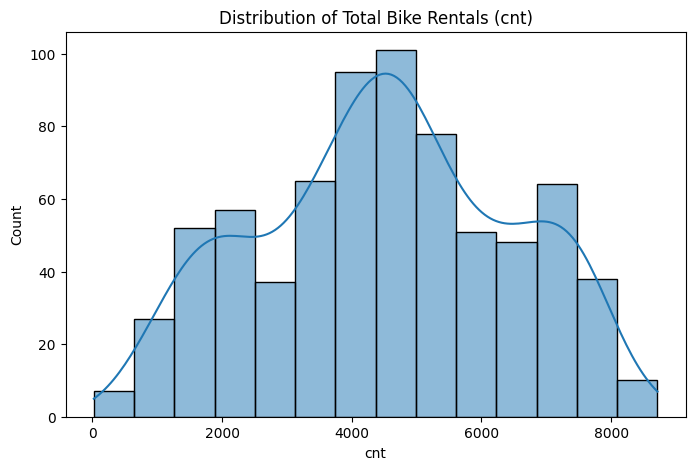

In [ ]:
# Visualize target variable - cnt
plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.show()


In [ ]:
# Drop the 'dteday' column (string) as it cannot be used in correlation
df = df.drop('dteday', axis=1)

In [ ]:
# Convert 'season' and 'weathersit' to categorical values
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'misty', 3: 'light_rain', 4: 'heavy_rain'})


In [ ]:
# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

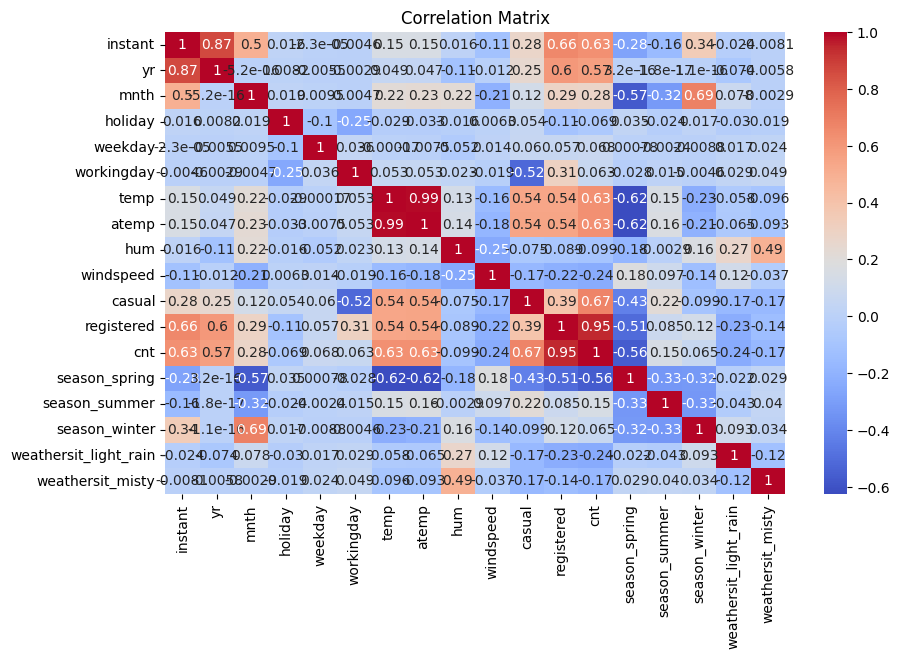

In [ ]:
# Generate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Standardize continuous features (temp, atemp, hum, windspeed)
scaler = StandardScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

In [ ]:
X = df.drop(['instant', 'casual', 'registered', 'cnt'], axis=1)

In [ ]:

y = df['cnt']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'r2_score: {r2}')

r2_score: 0.8520828533826301


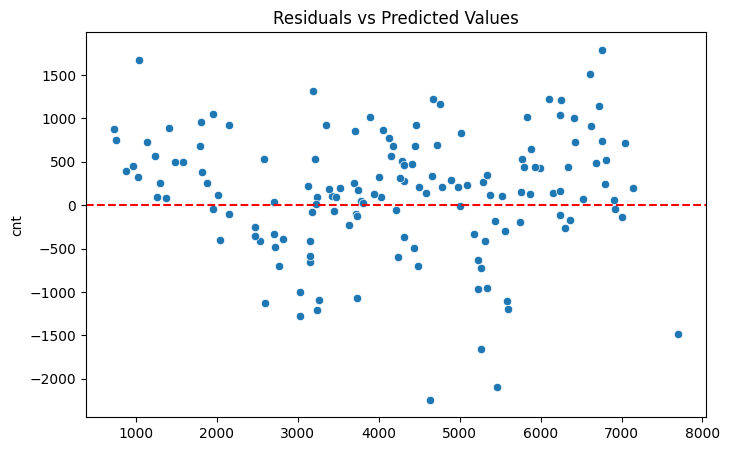

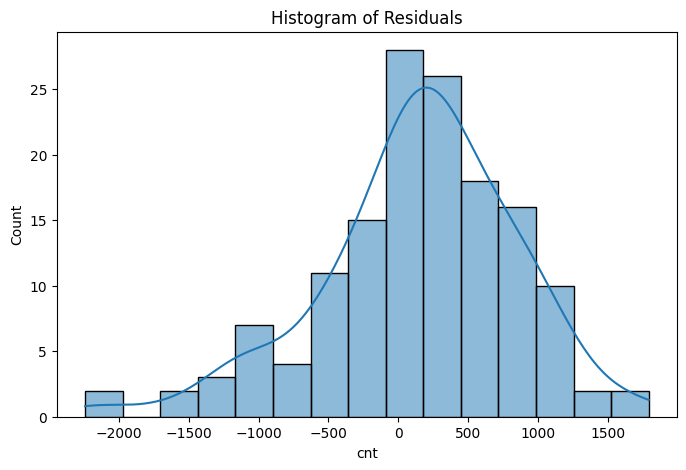

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# residuals vs predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

# histogram of residuals to check for normality
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
# Extract model coefficients
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
yr,1987.528872
season_winter,802.730631
temp,750.492847
season_summer,245.221851
atemp,188.752803
workingday,134.016348
weekday,67.858245
mnth,-28.498682
hum,-150.913514
windspeed,-217.977692


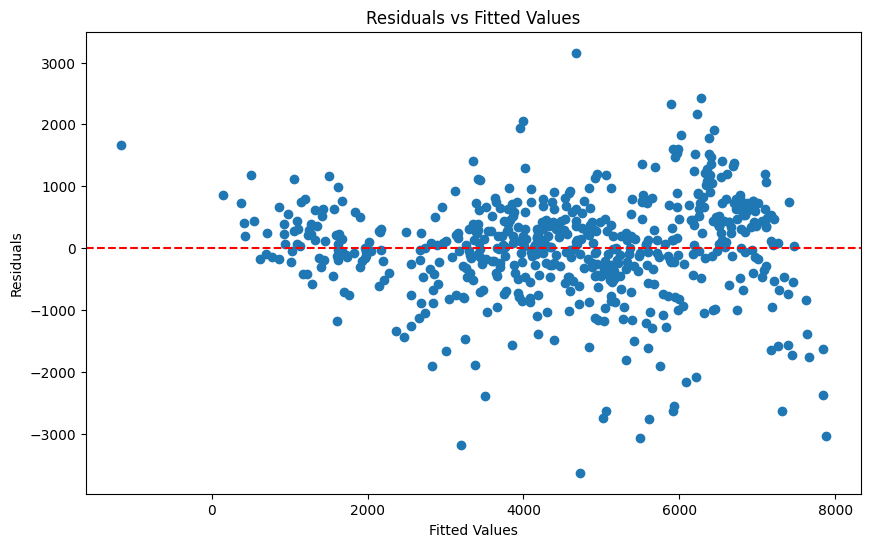

In [ ]:
# Predictions
y_train_pred = lr.predict(X_train)

# Residuals
residuals = y_train - y_train_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

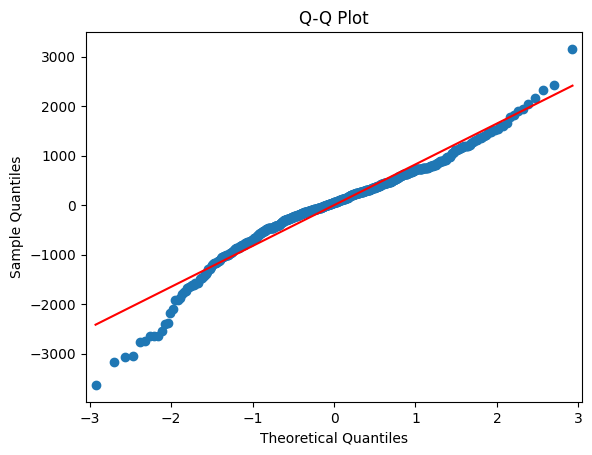

In [ ]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()


In [ ]:
dw_statistic = durbin_watson(residuals)
print(f'Durbin Watson Statistic {dw_statistic}')

Durbin Watson Statistic 2.004857492847648
